📘 **Note Format Guide**

This format serves as a structured guide for organizing lecture content, personal interpretation, experiments, and study-related questions.

| Type | What It Means | When I Use It |
|------|----------------|----------------|
| 📝 Lecture | Original material from the professor’s notes | When I’m referencing core concepts or provided code |
| 🗣️ In-Class Note | Verbal explanations shared during the lecture | When I want to record something the professor said in class but didn’t include in the official notes |
| ✍️ My Note | My thoughts, interpretations, or additional explanations | When I reflect on or explain something in my own words |
| 🔬 Experiment | Code I tried out or changed to explore further | When I test variations or go beyond the original example |
| ❓ Question | Questions I had while studying | When I want to revisit or research something more deeply |

📝
🗣️
✍️
🔬
❓

# 1. 강의노트 원본 및 영상 링크

[https://guebin.github.io/DL2025/posts/15wk-1.html](https://guebin.github.io/DL2025/posts/15wk-1.html)

# 2. Imports 📝

:::{.callout-note}
*코랩사용자는 아래코드 실행후 실습할것 *

```Python
!pip install swig
!pip install gymnasium[box2d]
```

*학과서버사용자는 가상환경에서 아래를 설치*

```bash
conda install conda-forge::gymnasium-box2d 
```
:::

In [1]:
import gymnasium as gym
#--#
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import IPython
#--#
import collections
import random
#--#
import torch

In [2]:
def show(imgs,jump=10):
    imgs = imgs[::jump]
    fig = plt.Figure()
    ax = fig.subplots()
    def update(i):
        ax.imshow(imgs[i])
    ani = FuncAnimation(fig,update,frames=len(imgs))
    display(IPython.display.HTML(ani.to_jshtml()))

# 3. 예비학습 📝

`-` `random.sample()`의 용법을  살펴보자. 

🗣️(

- 예시1
    - [1,2,3,4,5] 중 2개를 뽑음 

- 예시2
    - 3개 중 2개를 뽑음

In [3]:
s = [[0,0], [0,2], [3,2]]
a = [0,1,2]
memory = list(zip(s,a))
memory

[([0, 0], 0), ([0, 2], 1), ([3, 2], 2)]

)🗣️

`# 예시1`

In [3]:
random.sample([1,2,3,4,5],2)

[3, 2]

`# 예시2`

In [4]:
s = [[0,0], [0,2], [3,2]]
a = [0,1,2]
memory = list(zip(s,a))
random.sample(memory,2)

[([0, 2], 1), ([0, 0], 0)]

# 4. env: LunarLander 📝

🗣️(

- 환경을 직접 만들지 않고 기존에 있는 클래스 활용
- 게임 설명
    - 지형이 바뀜
    - 바람의 영향도 조금 있음
    - 목적: 잘 조정을 해서 깃발 안에 떨어지게 함

)🗣️

`-` ref: <https://gymnasium.farama.org/environments/box2d/lunar_lander/>

`-` Lunar Lander: 요약

**Observation Space (State Space)** -- 8개의 변수 

1. 착륙선의 x 좌표
2. 착륙선의 y 좌표
3. 착륙선의 x 속도
4. 착륙선의 y 속도
5. 착륙선의 각도
6. 착륙선의 각속도
7. 왼쪽 다리가 땅에 닿아있는지 여부 (1 또는 0)
8. 오른쪽 다리가 땅에 닿아있는지 여부 (1 또는 0)

**Action Space** -- 4개의 변수

1. {0 : 아무 행동도 하지 않음}
2. {1 : 왼쪽 엔진 발사 (오른쪽으로 기울임)}
3. {2 : 메인 엔진 발사 (위로 밀어 올림)} 
4. {3 : 오른쪽 엔진 발사 (왼쪽으로 기울임)}

**Reward** 

- **거리 보상**: 착륙 패드에 가까울수록 보상 증가
- **속도 보상**: 속도가 낮을수록 보상 증가
- **각도 보상**: 각도가 수직에 가까울수록 보상 증가
- **착륙 다리 보상**: 다리가 착륙 패드에 닿으면 보상
- **연료 사용 패널티**: 엔진 사용 시 패널티
- **안전한 착륙 보상**: 안정적으로 착륙 시 큰 보상 (+100~+140)
- **충돌 패널티**: 착륙 패드 이외의 장소에 충돌 시 패널티 (-100)

`-` 환경생성 

In [4]:
env = gym.make("LunarLander-v3", render_mode = "rgb_array")
env 

<frozen importlib._bootstrap>:228: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


<TimeLimit<OrderEnforcing<PassiveEnvChecker<LunarLander<LunarLander-v3>>>>>

`-` state_space 

🗣️(

In [5]:
env.observation_space

Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)

- 무엇을 의미하는지 잘 모르겠음
- ✍️ 범위?
- 샘플을 뽑아보면

)🗣️

In [6]:
env.observation_space.sample()

array([-9.2788523e-01,  2.1088607e+00,  3.9729960e-03,  4.4444327e+00,
        6.4698160e-01,  5.2979026e+00,  9.8654026e-01,  6.8356961e-01],
      dtype=float32)

- 8개의 숫자가 포함된 array가 나옴
- 이 8개의 숫자는 각각 상태를 의미함 

`-` action_space 

🗣️(

In [7]:
env.action_space

Discrete(4)

- 샘플을 뽑아보면

)🗣️

In [8]:
env.action_space.sample()

np.int64(1)

- 0,1,2,3 중 하나가 랜덤으로 뽑힘 

`-` env.reset()

In [11]:
env.reset()

(array([ 0.00563831,  1.4064701 ,  0.5710932 , -0.19778925, -0.00652668,
        -0.12936108,  0.        ,  0.        ], dtype=float32),
 {})

🗣️(

- env.start() 느낌
- 두 개의 return 값
    - [ 0.00563831,  1.4064701 ,  0.5710932 , -0.19778925, -0.00652668,        -0.12936108,  0.        ,  0.        ]: 상태를 의미
    - { }: 추가적인 information

)🗣️

`-` env.render() 

🗣️(

In [12]:
env.render()

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [13]:
env.render().shape

(400, 600, 3)

- 이미지 같음
- 현재의 게임 화면을 그림으로 rendering 하여 볼 수 있게 해줌
    - plt.imshow 함수 사용

)🗣️

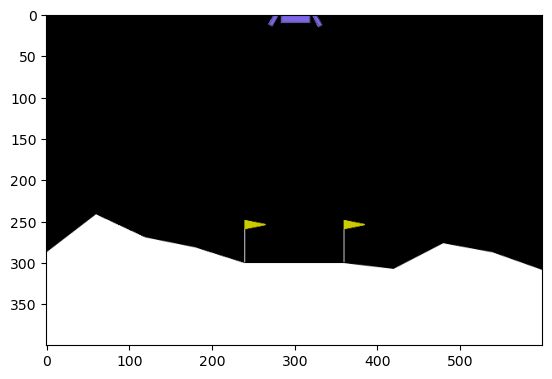

In [14]:
plt.imshow(env.render())

`-` env.step 

In [10]:
env.step??

Signature: env.step(action: 'ActType') -> 'tuple[ObsType, SupportsFloat, bool, bool, dict[str, Any]]'
Source:   
    def step(
        self, action: ActType
    ) -> tuple[ObsType, SupportsFloat, bool, bool, dict[str, Any]]:
        """Steps through the environment and if the number of steps elapsed exceeds ``max_episode_steps`` then truncate.

        Args:
            action: The environment step action

        Returns:
            The environment step ``(observation, reward, terminated, truncated, info)`` with `truncated=True`
            if the number of steps elapsed >= max episode steps

        """
        observation, reward, terminated, truncated, info = self.env.step(action)
        self._elapsed_steps += 1

        if self._elapsed_steps >= self._max_episode_steps:
            truncated = True

        return observation, reward, terminated, truncated, info
File:      ~/anaconda3/envs/dl2025/lib/python3.9/site-packages/gymnasium/wrappers/common.py
Type:      method

- 리턴되는 값은 `observation`, `reward`, `terminated`, `truncated`, `info`
- 우리가 쓰는 값은 `observation`, `reward`, `terminated`, `truncated`

🗣️(

- action을 입력으로 받음
- truncated
    - 1,000번의 프레임 동안만 게임 플레이 가능
    - 계속 올리면 게임이 끝나지 않기 때문에
- 정상적으로 플레이하다가 clear
    - terminated = True
    - truncated = False
- 정상적으로 플레이하다가 die
    - terminated = True
    - truncated = False
- 정상적으로 플레이하다가 timeout
    - terminated = False
    - truncated = True

In [15]:
env.step(0)

(array([ 0.01127691,  1.4014435 ,  0.5703218 , -0.22344746, -0.01291902,
        -0.12785819,  0.        ,  0.        ], dtype=float32),
 np.float64(-0.955798700878546),
 False,
 False,
 {})

- observation, reward, terminated, truncated 순
- info는 비어 있음

)🗣️

`-` play 

*첫시작화면*

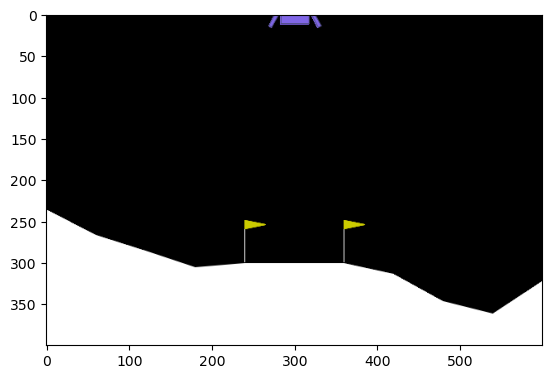

In [33]:
env.reset()
plt.imshow(env.render())

*플레이해보자*

🗣️(

```
Action Space -- 4개의 변수

{0 : 아무 행동도 하지 않음}
{1 : 왼쪽 엔진 발사 (오른쪽으로 기울임)}
{2 : 메인 엔진 발사 (위로 밀어 올림)}
{3 : 오른쪽 엔진 발사 (왼쪽으로 기울임)}
```

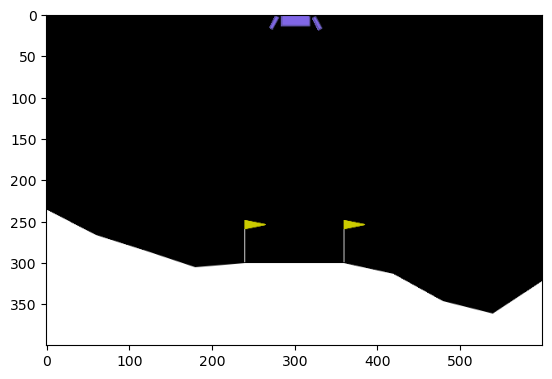

In [34]:
env.step(0)
plt.imshow(env.render())

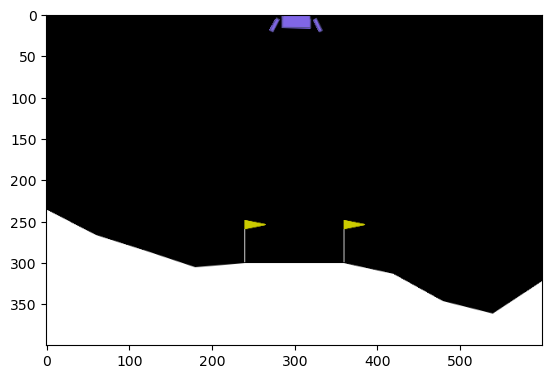

In [35]:
env.step(0)
plt.imshow(env.render())

- 매우 느림
- 10번 정도 반복 실행 하면 (세부 action은 강의 영상과는 다름)

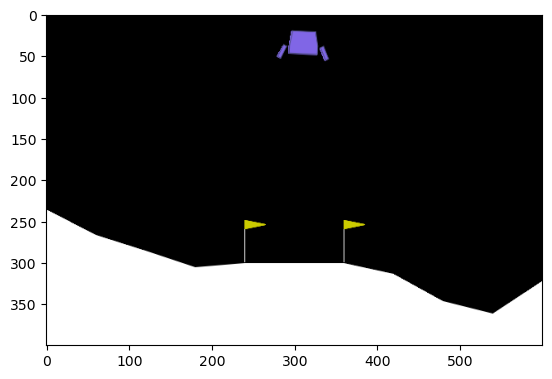

In [36]:
for _ in range(10):
    env.step(0)
    plt.imshow(env.render())

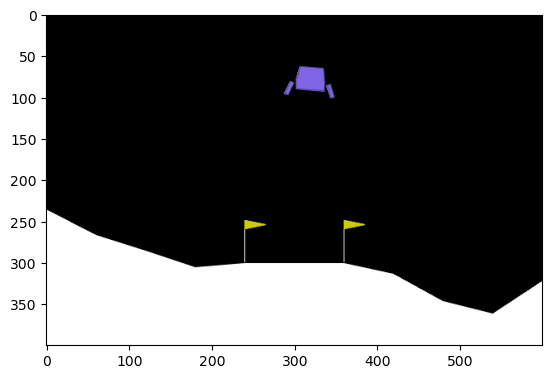

In [37]:
for _ in range(10):
    env.step(0)
    plt.imshow(env.render())

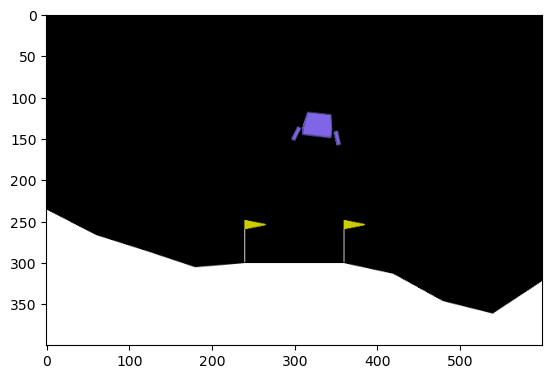

In [38]:
for _ in range(10):
    env.step(0)
    plt.imshow(env.render())

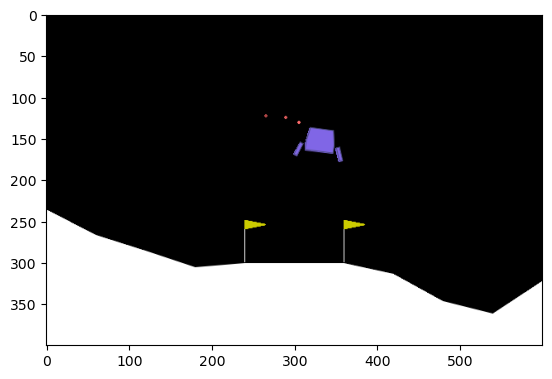

In [39]:
for _ in range(3):
    env.step(3)
    plt.imshow(env.render())

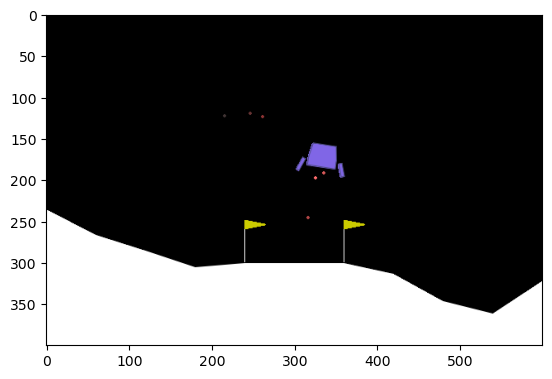

In [40]:
for _ in range(3):
    env.step(2)
    plt.imshow(env.render())

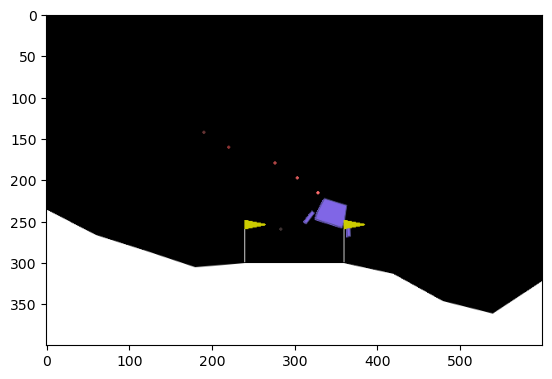

In [41]:
for _ in range(5):
    env.step(0)
    env.step(3)
    plt.imshow(env.render())

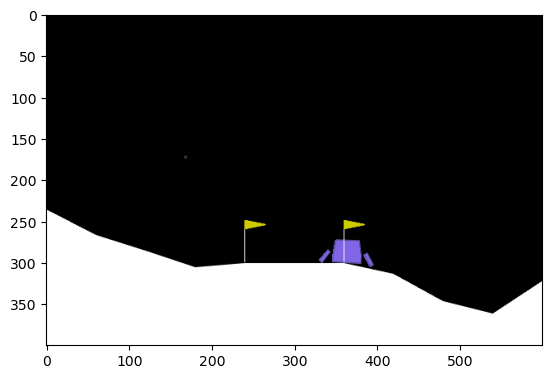

In [42]:
for _ in range(5):
    env.step(0)
    env.step(0)
    env.step(0)
    plt.imshow(env.render())

In [43]:
print(env.step(0))

(array([ 0.21715555, -0.04394788,  0.40055856, -0.02491728, -0.06356283,
       -0.31115538,  0.        ,  0.        ], dtype=float32), -100, True, False, {})


- reward: -100, terminated: True => die

)🗣️

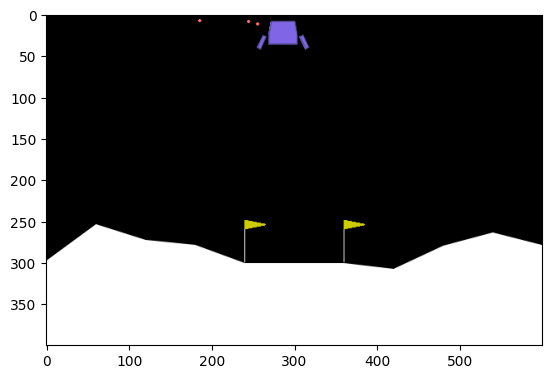

In [12]:
for _ in range(5):
    env.step(0) 
    env.step(3) 
plt.imshow(env.render())

# 5. 시각화 📝

🗣️(

In [44]:
env.reset()

(array([-1.2360573e-03,  1.4078571e+00, -1.2521335e-01, -1.3613933e-01,
         1.4390640e-03,  2.8362691e-02,  0.0000000e+00,  0.0000000e+00],
       dtype=float32),
 {})

In [45]:
state, _ = env.reset()
state

array([-0.00307007,  1.4083712 , -0.31098348, -0.1132924 ,  0.00356426,
        0.07044236,  0.        ,  0.        ], dtype=float32)

- imgs: 이미지를 저장할 리스트
- show: 처음에 정의한 함수

)🗣️

In [46]:
state, _ = env.reset()
imgs = []
for t in range(500):
    action = env.action_space.sample()
    next_state, reward, terminated, truncated, _ = env.step(action)
    imgs.append(env.render())
    state = next_state 
    if terminated or truncated:
        break

In [47]:
show(imgs)

# 6. `RandomAgent` 📝

🗣️(

```python
class RandomAgent:
    def __init__(self):
        pass
    def act(self):
        pass
    def learn(self):
        pass
    def save_experience(self):
        self.states.append(self.state)
        self.actions.append(self.action)
        self.rewards.append(self.reward)
        self.next_states.append(self.next_state)
        self.terminations.append(self.terminated)
```

```python
class RandomAgent:
    def __init__(self):
        self.state = None
        self.action = None
        self.reward = None
        self.next_state = None
        self.terminated = None
        #---#
        self.states = collections.deque(maxlen = 5000)
        self.actions = collections.deque(maxlen = 5000)
        self.rewards = collections.deque(maxlen = 5000)
        self.next_states = collections.deque(maxlen = 5000)
        self.terminations = collections.deque(maxlen = 5000)
    def act(self):
        pass
    def learn(self):
        pass
    def save_experience(self):
        self.states.append(self.state)
        self.actions.append(self.action)
        self.rewards.append(self.reward)
        self.next_states.append(self.next_state)
        self.terminations.append(self.terminated)
```

- truncated는 굳이 쓸 필요가 없을 것 같아 저장 X

In [49]:
class RandomAgent:
    def __init__(self):
        self.action_space = gym.spaces.Discrete(4)
        #---#
        self.state = None
        self.action = None
        self.reward = None
        self.next_state = None
        self.terminated = None
        #---#
        self.states = collections.deque(maxlen = 5000)
        self.actions = collections.deque(maxlen = 5000)
        self.rewards = collections.deque(maxlen = 5000)
        self.next_states = collections.deque(maxlen = 5000)
        self.terminations = collections.deque(maxlen = 5000)
    def act(self):
        self.action = self.action_space.sample()
    def learn(self):
        pass
    def save_experience(self):
        self.states.append(self.state)
        self.actions.append(self.action)
        self.rewards.append(self.reward)
        self.next_states.append(self.next_state)
        self.terminations.append(self.terminated)

- step 1: action
- step 2: 전달
- step 3: save & learn
- step 4: 다음 iteration 준비

In [50]:
env = gym.make("LunarLander-v3", render_mode = "rgb_array")
player = RandomAgent()
player.state,_ = env.reset()
for e in range(1,101):
    while True:
        # step1
        player.act()
        # step2
        player.next_state, player.reward, player.terminated, player.truncated, _ = env.step(player.action)
        # step3
        player.save_experience()
        player.learn()
        # step4 
        if player.terminated or player.truncated: 
            player.state, _ = env.reset()
            break 
        else: 
            player.state = player.next_state

- 잘 저장되어 있는지 확인

In [58]:
# player.states # numpy array

In [54]:
# player.actions

In [55]:
player.truncated

False

In [57]:
# player.terminations

- 참고) 강의 노트 원본 (아래) RandomAgent는 save_experience에서 torch.tensor가 들어가 있음
- 7.4 전까지는 그냥 없는 버전으로 실행하였고 (강의 노트 원본 코드 제외, 강의 노트 원본 코드는 실행 안 함)
- 7.4부터는 원본 버전으로 실행

)🗣️

In [15]:
class RandomAgent:
    def __init__(self):
        self.action_spcae = gym.spaces.Discrete(4)
        self.n_experieces = 0 
        #---#
        self.state = None 
        self.action = None 
        self.reward = None 
        self.next_state = None 
        self.terminated = None 
        #---#
        self.states = collections.deque(maxlen = 5000)
        self.actions = collections.deque(maxlen = 5000)
        self.rewards = collections.deque(maxlen = 5000)
        self.next_states = collections.deque(maxlen = 5000)
        self.terminations = collections.deque(maxlen = 5000)
    def act(self):
        self.action = self.action_spcae.sample()
    def learn(self):
        pass 
    def save_experience(self):
        self.states.append(torch.tensor(self.state))
        self.actions.append(self.action)
        self.rewards.append(self.reward)
        self.next_states.append(torch.tensor(self.next_state))
        self.terminations.append(self.terminated)
        self.n_experieces = self.n_experieces+1

In [16]:
env = gym.make("LunarLander-v3", render_mode = "rgb_array")
player = RandomAgent()
player.state,_ = env.reset()
for e in range(1,101):
    while True:
        # step1
        player.act()
        # step2
        player.next_state, player.reward, player.terminated, player.truncated, _ = env.step(player.action)
        # step3
        player.save_experience()
        player.learn()
        # step4 
        if player.terminated or player.truncated: 
            player.state, _ = env.reset()
            break 
        else: 
            player.state = player.next_state

# 7. `q_net` 📝

In [61]:
# 이제 우리가 할것: q_table --> action 을 결정해야함. 

# 4x4 그리드 -- 복습 
# q_table[상태] = [행동0을했을때 품질, 행동1을했을때품질, 행동2를했을때품질, 행동3을했을때품질]  
# 행동 = argmax(q_table[상태])

# 루나랜더 -- 오늘 할것 
# q_net[8개의숫자] = [행동0을했을때 품질, 행동1을했을때품질, 행동2를했을때품질, 행동3을했을때품질] # 결국 숫자8개를 숫자4개로 만들어주는 적당한 q_net을 구성
# 행동 = argmax(q_net[8개의숫자])

🗣️(

- 과거

```
q_table[0,0, 0] = ??
q_table[0,0, 1] = ??
q_table[0,0, 2] = ??
q_table[0,0, 3] = ??
#---#
q_table[0,1, 0] = ??
q_table[0,1, 1] = ??
q_table[0,1, 2] = ??
q_table[0,1, 3] = ??
```

- 현재
    - 숫자가 연속형이라 까다로움 

In [59]:
env.observation_space.sample()

array([ 0.38724837,  0.19059889, -6.182767  ,  3.6453786 , -3.1740656 ,
        8.74314   ,  0.31359115,  0.6998068 ], dtype=float32)

In [60]:
env.observation_space.sample()

array([-0.54199886,  0.37739053, -6.8368096 ,  8.243433  , -1.4476558 ,
       -4.5691466 ,  0.67033297,  0.26339018], dtype=float32)

```
q_table[0.38724837,  0.19059889, -6.182767  ,  3.6453786 , -3.1740656 , 8.74314   ,  0.31359115,  0.6998068, 0] = ??
q_table[0.38724837,  0.19059889, -6.182767  ,  3.6453786 , -3.1740656 , 8.74314   ,  0.31359115,  0.6998068, 1] = ??
q_table[0.38724837,  0.19059889, -6.182767  ,  3.6453786 , -3.1740656 , 8.74314   ,  0.31359115,  0.6998068, 2] = ??
q_table[0.38724837,  0.19059889, -6.182767  ,  3.6453786 , -3.1740656 , 8.74314   ,  0.31359115,  0.6998068, 3] = ??
#---#
q_table[-0.54199886,  0.37739053, -6.8368096 ,  8.243433  , -1.4476558 , -4.5691466 ,  0.67033297,  0.26339018, 0] = ??
q_table[-0.54199886,  0.37739053, -6.8368096 ,  8.243433  , -1.4476558 , -4.5691466 ,  0.67033297,  0.26339018, 1] = ??
q_table[-0.54199886,  0.37739053, -6.8368096 ,  8.243433  , -1.4476558 , -4.5691466 ,  0.67033297,  0.26339018, 2] = ??
q_table[-0.54199886,  0.37739053, -6.8368096 ,  8.243433  , -1.4476558 , -4.5691466 ,  0.67033297,  0.26339018, 3] = ??
```

)🗣️

`-` 전략: 4x4에서 `q_table`에 대응하는 뭔가가 있으면 된다. 그런데 `q_table`와 같이 테이블 형식으로는 힘들것 같다. $\to$ `q_net`를 만들자.

- 4x4 grid: 상태공간의 차원은 2차원이며 가질수 있는 값은 16개, 각 상태공간에서 할수 있는 행동이 4개 -> 총 16*4의 경우의 수에 대한 reward만 조사하면 되었음
- LunarLander: 상태공간의 차원은 8차원이지만 가질수 있는 값의 범위는 무한대 -> 무수히 많은 경우에 대한 reward 값을 조사하는건 현실적으로 불가능 

*상황*

In [18]:
state = player.states[100]
action = player.actions[100]
reward = player.rewards[100]
next_state = player.next_states[100]
terminated = player.terminations[100]

`1`. `q_net` 

🗣️(

In [63]:
# player.q_net # 현재 없어서 error

In [64]:
player.q_net = torch.nn.Sequential(
    torch.nn.Linear(8,256),
    torch.nn.ReLU(),
    torch.nn.Linear(256,128),
    torch.nn.ReLU(),
    torch.nn.Linear(128,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,4)
)

- 4개의 층

In [65]:
player.q_net

Sequential(
  (0): Linear(in_features=8, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=4, bias=True)
)

In [67]:
torch.tensor(env.observation_space.sample())

tensor([-1.3189,  0.9664,  2.3762, -7.5418,  5.8477,  0.6544,  0.3398,  0.7094])

In [68]:
player.q_net(torch.tensor(env.observation_space.sample()))

tensor([-0.1090,  0.2078, -0.2280,  0.0221], grad_fn=<ViewBackward0>)

- 8개의 숫자를 넣으면 4개의 숫자가 나옴

In [69]:
state = torch.tensor(env.observation_space.sample())
player.q_net(state)

tensor([-0.0012,  0.0180, -0.3318, -0.1024], grad_fn=<ViewBackward0>)

- notation 정리 (강의 노트 상황 설정 전)

In [74]:
state = env.observation_space.sample()
s = torch.tensor(state)
player.q_net(s)

tensor([-0.1517, -0.0282, -0.1357, -0.0040], grad_fn=<ViewBackward0>)

- 상황 설정 후

In [75]:
state = player.states[100]
action = player.actions[100]
reward = player.rewards[100]
next_state = player.next_states[100]
terminated = player.terminations[100]

In [77]:
player.q_net(torch.tensor(state))

tensor([ 0.0353,  0.0744, -0.0374, -0.0312], grad_fn=<ViewBackward0>)

)🗣️

In [19]:
player.q_net = torch.nn.Sequential(
    torch.nn.Linear(8,256),
    torch.nn.ReLU(),
    torch.nn.Linear(256,128),
    torch.nn.ReLU(),
    torch.nn.Linear(128,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,4)
)

In [20]:
player.q_net(state)

tensor([-0.1211,  0.1420,  0.0979, -0.1142], grad_fn=<ViewBackward0>)

- 8개의 숫자가 들어가서 4개의 숫자가 나옴 

`2`. `q_hat`

🗣️(

In [70]:
state = torch.tensor(env.observation_space.sample())
player.q_net(state)

tensor([-0.0392, -0.0271, -0.1871, -0.0522], grad_fn=<ViewBackward0>)

- action 0,1,2,3을 했을 때의 품질

In [71]:
state = torch.tensor(env.observation_space.sample())
action = 0
player.q_net(state)[action]

tensor(-0.0842, grad_fn=<SelectBackward0>)

- notation 정리 (강의 노트 상황 설정 전)

In [73]:
state = env.observation_space.sample()
s = torch.tensor(state)
a = action = 0
player.q_net(s)[a]

tensor(-0.1071, grad_fn=<SelectBackward0>)

- 상황 설정 후

In [78]:
state = player.states[100]
action = player.actions[100]
reward = player.rewards[100]
next_state = player.next_states[100]
terminated = player.terminations[100]

In [79]:
q_hat = player.q_net(torch.tensor(state))[action]

In [80]:
q_hat

tensor(0.0744, grad_fn=<SelectBackward0>)

)🗣️

In [21]:
q_hat = player.q_net(state)[action]

`3`. `q` ($q = r + 0.99 \times {\tt future}$)

🗣️(

In [72]:
env.step(action)

(array([-0.01383076,  1.4314287 , -0.69949836,  0.442844  ,  0.01585995,
         0.15681908,  0.        ,  0.        ], dtype=float32),
 np.float64(-0.30288280327448547),
 False,
 False,
 {})

In [81]:
# next_state, reward, terminated, truncated, _ = env.step(action)
# future = player.qnet(torch.tensor(next_state)).max()
# reward + 0.99 * future

- 상황 설정 후

In [78]:
state = player.states[100]
action = player.actions[100]
reward = player.rewards[100]
next_state = player.next_states[100]
terminated = player.terminations[100]

In [82]:
future = player.q_net(torch.tensor(next_state)).max()
q = reward + 0.99 * future

In [83]:
q

tensor(0.6048, grad_fn=<AddBackward0>)

- q_hat은 현재 엉터리 값
- 목표: q_hat $\approx$ q
- 그러나 y가 주어져 있는 이전 상황 y_hat $\approx$ y 와 달리 현재는 q 도 네트워크에서 나옴
    - reward만 주어져 있고 나머지는 아니라 애매함
- q를 주어진 값으로 생각하면

In [84]:
future

tensor(0.0752, grad_fn=<MaxBackward1>)

In [85]:
future = player.q_net(torch.tensor(next_state)).max().data
q = reward + 0.99 * future

In [86]:
q_hat, q

(tensor(0.0744, grad_fn=<SelectBackward0>), tensor(0.6048))

- q_hat과 q가 비슷해질 때까지 학습이 되겠다고 생각 가능

In [88]:
if terminated: 
    q = reward # q는 꼬리표가 없는 숫자 
else: 
    future = player.q_net(torch.tensor(next_state)).max().data # future에 꼬리표가 있으면 q에도 꼬리표가 생기므로 꼬리표 제거 
    q = reward + 0.99 * future # q는 꼬리표가 없는 숫자 

)🗣️

In [22]:
if terminated: 
    q = reward # q는 꼬리표가 없는 숫자 
else: 
    future = player.q_net(next_state).max().data # future에 꼬리표가 있으면 q에도 꼬리표가 생기므로 꼬리표 제거 
    q = reward + 0.99 * future # q는 꼬리표가 없는 숫자 

`4`. `q_hat` 을 점점 `q` 와 비슷하게 만드는 과정 = `player.q_net`를 학습하는 과정 

🗣️(

- 여기서부터는 강의 노트 원본 버전으로 Agent 실행

In [103]:
class RandomAgent:
    def __init__(self):
        self.action_spcae = gym.spaces.Discrete(4)
        self.n_experieces = 0 
        #---#
        self.state = None 
        self.action = None 
        self.reward = None 
        self.next_state = None 
        self.terminated = None 
        #---#
        self.states = collections.deque(maxlen = 5000)
        self.actions = collections.deque(maxlen = 5000)
        self.rewards = collections.deque(maxlen = 5000)
        self.next_states = collections.deque(maxlen = 5000)
        self.terminations = collections.deque(maxlen = 5000)
    def act(self):
        self.action = self.action_spcae.sample()
    def learn(self):
        pass 
    def save_experience(self):
        self.states.append(torch.tensor(self.state))
        self.actions.append(self.action)
        self.rewards.append(self.reward)
        self.next_states.append(torch.tensor(self.next_state))
        self.terminations.append(self.terminated)
        self.n_experieces = self.n_experieces+1

In [104]:
env = gym.make("LunarLander-v3", render_mode = "rgb_array")
player = RandomAgent()
player.state,_ = env.reset()
for e in range(1,101):
    while True:
        # step1
        player.act()
        # step2
        player.next_state, player.reward, player.terminated, player.truncated, _ = env.step(player.action)
        # step3
        player.save_experience()
        player.learn()
        # step4 
        if player.terminated or player.truncated: 
            player.state, _ = env.reset()
            break 
        else: 
            player.state = player.next_state

In [105]:
state = player.states[100]
action = player.actions[100]
reward = player.rewards[100]
next_state = player.next_states[100]
terminated = player.terminations[100]

In [107]:
player.q_net = torch.nn.Sequential(
    torch.nn.Linear(8,256),
    torch.nn.ReLU(),
    torch.nn.Linear(256,128),
    torch.nn.ReLU(),
    torch.nn.Linear(128,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,4)
)

In [108]:
player.q_net(state)

tensor([ 0.0076, -0.0058, -0.0310,  0.1106], grad_fn=<ViewBackward0>)

In [109]:
q_hat = player.q_net(state)[action]

In [110]:
if terminated: 
    q = reward # q는 꼬리표가 없는 숫자 
else: 
    future = player.q_net(next_state).max().data # future에 꼬리표가 있으면 q에도 꼬리표가 생기므로 꼬리표 제거 
    q = reward + 0.99 * future # q는 꼬리표가 없는 숫자 

- 이전 코드 실행 끝

In [90]:
# loss = (q_hat - q)**2
# loss를 점차 줄이면됨

- player.q_net.parameters()를 학습해야하므로 optimizer가 필요함

In [111]:
player.optimizr = torch.optim.Adam(player.q_net.parameters())

In [112]:
q_hat

tensor(0.0076, grad_fn=<SelectBackward0>)

In [113]:
q

tensor(-0.3956)

- q_hat과 q가 스칼라이므로 loss를 스칼라로 코드를 짜서 계산하려고 함
- 벡터로 계산하는 것이 좋지만 당장 쓰기 까다로워서 (지저분 함)

In [114]:
player.optimizr = torch.optim.Adam(player.q_net.parameters())
memory = list(zip(player.states, player.actions, player.rewards, player.next_states, player.terminations))

In [115]:
len(memory)

5000

In [116]:
memory[0]

(tensor([-0.0021,  1.4146, -0.2150,  0.1644,  0.0025,  0.0487,  0.0000,  0.0000]),
 np.int64(1),
 np.float64(0.03960169070262623),
 tensor([-0.0043,  1.4177, -0.2233,  0.1385,  0.0066,  0.0826,  0.0000,  0.0000]),
 False)

In [117]:
memory[1]

(tensor([-0.0043,  1.4177, -0.2233,  0.1385,  0.0066,  0.0826,  0.0000,  0.0000]),
 np.int64(1),
 np.float64(-0.4859194165555596),
 tensor([-0.0066,  1.4203, -0.2332,  0.1118,  0.0127,  0.1223,  0.0000,  0.0000]),
 False)

In [118]:
memory[2]

(tensor([-0.0066,  1.4203, -0.2332,  0.1118,  0.0127,  0.1223,  0.0000,  0.0000]),
 np.int64(0),
 np.float64(0.2302028958607707),
 tensor([-0.0089,  1.4222, -0.2333,  0.0851,  0.0188,  0.1223,  0.0000,  0.0000]),
 False)

- loss 계산

In [119]:
loss = 0
for s, a, r, ss, tmd in memory:
    qhat = player.q_net(s)[a]
    if tmd:
        q = r
    else:
        future = player.q_net(ss).max().data
        q = r + 0.99 * future
    loss = loss + (q_hat - q)**2
loss = loss / 5000

In [120]:
loss

tensor(126.6637, grad_fn=<DivBackward0>)

```
여러 경험이 있는데,
저장된 것을 업데이트할 때
1 2 3 ... 5000 -- 업데이트 -->
2~5001 -- 업데이트 -->
3~5002 -- 업데이트 -->
이런 식으로 전부 하지말고
몇개 씩만 뽑아서 업데이트를 하면
학습이 조금 더 안정적으로 잘 됨
```

In [143]:
loss = 0
mini_batch = random.sample(memory, 64)
for s, a, r, ss, tmd in mini_batch:
    qhat = player.q_net(s)[a]
    if tmd:
        q = r
    else:
        future = player.q_net(ss).max().data
        q = r + 0.99 * future
    loss = loss + (q_hat - q)**2
loss = loss / 64

In [144]:
loss

tensor(6.0927, grad_fn=<DivBackward0>)

- 정리

In [148]:
player.optimizr = torch.optim.Adam(player.q_net.parameters())
for epoc in range(5):
    memory = list(zip(player.states, player.actions, player.rewards, player.next_states, player.terminations))
    mini_batch = random.sample(memory,64)
    # step1-2 
    loss = 0
    for s,a,r,ss,tmd in mini_batch:
        q_hat = player.q_net(s)[a]
        if tmd: 
            q = r 
        else: 
            future = player.q_net(ss).max().data 
            q = r + 0.99 * future
        loss = loss + (q_hat-q)**2
    loss = loss / 64
    # step3
    loss.backward()
    # step4 
    player.optimizr.step()
    player.optimizr.zero_grad()

)🗣️

In [23]:
# loss = (q_hat - q)**2
# loss를 점차 줄이면됨

In [24]:
player.optimizr = torch.optim.Adam(player.q_net.parameters())
for epoc in range(5):
    memory = list(zip(player.states, player.actions, player.rewards, player.next_states, player.terminations))
    mini_batch = random.sample(memory,64)
    # step1-2 
    loss = 0
    for s,a,r,ss,tmd in mini_batch:
        q_hat = player.q_net(s)[a]
        if tmd: 
            q = r 
        else: 
            future = player.q_net(ss).max().data 
            q = r + 0.99 * future
        loss = loss + (q_hat-q)**2
    loss = loss / 64
    # step3
    loss.backward()
    # step4 
    player.optimizr.step()
    player.optimizr.zero_grad()

`5`. 행동..? 

🗣️(

In [151]:
player.q_net(s) # 현재 상태 넣기

tensor([-0.1928, -0.0458, -0.0677,  0.0760], grad_fn=<ViewBackward0>)

In [153]:
player.q_net(s).argmax()

tensor(3)

In [154]:
player.q_net(s).argmax().item() # action

3

In [25]:
# 이전에는 아래와 같은 방식
## 1. 특정 시점 이전에는 계속 랜덤액션만
## 2. 특정 시점 이후에는 계속 q_table에서 도출되는 행동만 
# 이번에는 아래와 같이 해보자. 
## 1. 처음에는 랜덤액션
## 2. 점차 에피소드가 지날수록, q_net에서 근거한 행동만

In [155]:
random.random() # 0과 1 사이

0.36176671095762414

In [156]:
player.state

array([ 1.2628555e-03,  1.3995621e+00,  1.2789896e-01, -5.0480115e-01,
       -1.4565670e-03, -2.8971046e-02,  0.0000000e+00,  0.0000000e+00],
      dtype=float32)

In [157]:
player.eps = 0.5
if random.random() < player.eps:
    player.action = player.action_space.sample()
else:
    state = torch.tensor(player.state)
    player.action = player.q_net(state).argmax().item()

In [158]:
# 다음 에피소드에서는 아래와 같이 확률을 조금 낮게
player.eps = player.eps*0.99

)🗣️

In [25]:
# 이전에는 아래와 같은 방식
## 1. 특정 시점 이전에는 계속 랜덤액션만
## 2. 특정 시점 이후에는 계속 q_table에서 도출되는 행동만 
# 이번에는 아래와 같이 해보자. 
## 1. 처음에는 랜덤액션
## 2. 점차 에피소드가 지날수록, q_net에서 근거한 행동만

In [26]:
player.eps = 0.5 
if random.random() < player.eps: 
    player.action = player.action_spcae.sample()
else:
    state = torch.tensor(player.state)
    player.action = player.q_net(state).argmax().item()

In [27]:
# 다음에피소드에서는 아래와 같이 확률을 조금 낮게 
player.eps = player.eps* 0.99 

# 8. Agent 📝

🗣️(

- 위의 내용들을 종합하여 실제로 동작하는 Agent를 만들려고 함

In [159]:
class Agent(RandomAgent):
    def __init__(self):
        super().__init__()
        self.eps = 1.0
        self.q_net = torch.nn.Sequential(
            torch.nn.Linear(8,256),
            torch.nn.ReLU(),
            torch.nn.Linear(256,128),
            torch.nn.ReLU(),
            torch.nn.Linear(128,64),
            torch.nn.ReLU(),
            torch.nn.Linear(64,4)
        )
        self.optimizr = torch.optim.Adam(self.q_net.parameters())
    def act(self):
        if random.random() < self.eps:
            self.action = self.action_space.sample()
        else:
            state = torch.tensor(self.state)
            self.action = self.q_net(state).argmax().item()
    def learn():
        self.optimizr = torch.optim.Adam(self.q_net.parameters())
        for epoc in range(1): # 5번도 너무 많으므로 1번으로 줄임
            memory = list(zip(self.states, self.actions, self.rewards, self.next_states, self.terminations))
            mini_batch = random.sample(memory,64)
            # step1-2 
            loss = 0
            for s,a,r,ss,tmd in mini_batch:
                q_hat = self.q_net(s)[a]
                if tmd: 
                    q = r 
                else: 
                    future = self.q_net(ss).max().data 
                    q = r + 0.99 * future
                loss = loss + (q_hat-q)**2
            loss = loss / 64
            # step3
            loss.backward()
            # step4 
            self.optimizr.step()
            self.optimizr.zero_grad()

)🗣️

In [28]:
class Agent(RandomAgent):
    def __init__(self):
        super().__init__()
        self.eps = 1.0 
        self.q_net = torch.nn.Sequential(
            torch.nn.Linear(8,256),
            torch.nn.ReLU(),
            torch.nn.Linear(256,128),
            torch.nn.ReLU(),
            torch.nn.Linear(128,64),
            torch.nn.ReLU(),
            torch.nn.Linear(64,4)
        )
        self.optimizr = torch.optim.Adam(self.q_net.parameters())
    def act(self):
        if random.random() < self.eps: 
            self.action = self.action_spcae.sample()
        else:
            state = torch.tensor(self.state)
            self.action = self.q_net(state).argmax().item()
    def learn(self):
        if self.n_experieces > 64:
            for epoc in range(1):
                memory = list(zip(self.states, self.actions, self.rewards, self.next_states, self.terminations))
                mini_batch = random.sample(memory,64)
                # step1-2 
                loss = 0
                for s,a,r,ss,tmd in mini_batch:
                    q_hat = self.q_net(s)[a]
                    if tmd: 
                        q = r 
                    else: 
                        future = self.q_net(ss).max().data 
                        q = r + 0.99 * future
                    loss = loss + (q_hat-q)**2
                loss = loss / 64
                # step3
                loss.backward()
                # step4 
                self.optimizr.step()
                self.optimizr.zero_grad()        

# 9. Solve 📝

🗣️(

```python
env = gym.make("LunarLander-v3", render_mode = "rgb_array")
player = Agent()
player.state, _ = env.reset()
#---#
for e in range(1,2001):
    #---에피소드시작---#
    while True:
        # step1
        player.act()
        # step2
        player.next_state, player.reward, player.terminated, player.truncated, _ = env.step(player.action)
        # step3
        player.save_experience()
        player.learn()
        # step4
        if player.terminated or player.truncated:
            player.state, _ = env.reset()
        else:
            player.state = player.next_state
    #---에피소드끝---#
    player.eps = player.eps * 0.995
```

- score를 계산할 필요가 있음
- 공식 문서를 보면 한 에피소드에서 200점을 받으면 solution으로 간주해도 좋다고 함

```python
env = gym.make("LunarLander-v3", render_mode = "rgb_array")
player = Agent()
player.state, _ = env.reset()
score = 0
scores = []
#---#
for e in range(1,2001):
    #---에피소드시작---#
    while True:
        # step1
        player.act()
        # step2
        player.next_state, player.reward, player.terminated, player.truncated, _ = env.step(player.action)
        # step3
        player.save_experience()
        player.learn()
        # step4
        if player.terminated or player.truncated:
            score = score + player.reward
            scores.append(score)
            score = 0
            player.state, _ = env.reset()
        else:
            score = score + player.reward
            player.state = player.next_state
    #---에피소드끝---#
    player.eps = player.eps * 0.995
```

- 에피소드 별 플레이 타임도 궁금함

```python
env = gym.make("LunarLander-v3", render_mode = "rgb_array")
player = Agent()
player.state, _ = env.reset()
score = 0
scores = []
playtime = 0
playtimes = []
#---#
for e in range(1,2001):
    #---에피소드시작---#
    while True:
        # step1
        player.act()
        # step2
        player.next_state, player.reward, player.terminated, player.truncated, _ = env.step(player.action)
        # step3
        player.save_experience()
        player.learn()
        # step4
        if player.terminated or player.truncated:
            score = score + player.reward
            scores.append(score)
            score = 0
            playtimes.append(playtime)
            player.state, _ = env.reset()
        else:
            score = score + player.reward
            playtime = playtime + 1
            player.state = player.next_state
    #---에피소드끝---#
    player.eps = player.eps * 0.995
```

- n_experences가 없으면 batch를 뽑을 때 error가 날 수 있으므로 RandomAgent에 추가 후 코드 수정
    - 참고: n_experieces (n 없음)
    - 7.4에서 이미 수정된 강의노트 버전(RandomAgent)을 실행하긴 하여 Agent 수정 과정부터 있음

In [160]:
class Agent(RandomAgent):
    def __init__(self):
        super().__init__()
        self.eps = 1.0 
        self.q_net = torch.nn.Sequential(
            torch.nn.Linear(8,256),
            torch.nn.ReLU(),
            torch.nn.Linear(256,128),
            torch.nn.ReLU(),
            torch.nn.Linear(128,64),
            torch.nn.ReLU(),
            torch.nn.Linear(64,4)
        )
        self.optimizr = torch.optim.Adam(self.q_net.parameters())
    def act(self):
        if random.random() < self.eps: 
            self.action = self.action_spcae.sample()
        else:
            state = torch.tensor(self.state)
            self.action = self.q_net(state).argmax().item()
    def learn(self):
        if self.n_experieces > 64:
            for epoc in range(1):
                memory = list(zip(self.states, self.actions, self.rewards, self.next_states, self.terminations))
                mini_batch = random.sample(memory,64)
                # step1-2 
                loss = 0
                for s,a,r,ss,tmd in mini_batch:
                    q_hat = self.q_net(s)[a]
                    if tmd: 
                        q = r 
                    else: 
                        future = self.q_net(ss).max().data 
                        q = r + 0.99 * future
                    loss = loss + (q_hat-q)**2
                loss = loss / 64
                # step3
                loss.backward()
                # step4 
                self.optimizr.step()
                self.optimizr.zero_grad()        

- 짝수번째마다 출력을 하고 싶음
- 오래 걸리므로 일단 20번만
- 이외 추가된 내용
    - step4 playtime = 0, break 

In [164]:
env = gym.make("LunarLander-v3", render_mode = "rgb_array")
player = Agent()
player.state, _ = env.reset()
score = 0
scores = []
playtime = 0
playtimes = []
#---#
for e in range(1,21):
    #---에피소드시작---#
    while True:
        # step1
        player.act()
        # step2
        player.next_state, player.reward, player.terminated, player.truncated, _ = env.step(player.action)
        # step3
        player.save_experience()
        player.learn()
        # step4
        if player.terminated or player.truncated:
            score = score + player.reward
            scores.append(score)
            score = 0
            playtimes.append(playtime)
            playtime = 0
            player.state, _ = env.reset()
            break
        else:
            score = score + player.reward
            playtime = playtime + 1
            player.state = player.next_state
    #---에피소드끝---#
    player.eps = player.eps * 0.995
    if (e % 2) == 0:
        print(
            f"에피소드{e}\t",
            f"경험: {player.n_experieces}\t",
            f"점수(평균): {np.mean(scores[-100:]):.2f}\t", # 최근 100번만
            f"게임시간(평균): {np.mean(playtimes[-100:]):.2f}\t",
            f"돌발행동: {player.eps:.2f}\t",
        )

에피소드2	 경험: 212	 점수(평균): -386.56	 게임시간(평균): 105.00	 돌발행동: 0.99	
에피소드4	 경험: 396	 점수(평균): -261.93	 게임시간(평균): 98.00	 돌발행동: 0.98	
에피소드6	 경험: 564	 점수(평균): -226.24	 게임시간(평균): 93.00	 돌발행동: 0.97	
에피소드8	 경험: 801	 점수(평균): -222.69	 게임시간(평균): 99.12	 돌발행동: 0.96	
에피소드10	 경험: 945	 점수(평균): -212.39	 게임시간(평균): 93.50	 돌발행동: 0.95	
에피소드12	 경험: 1138	 점수(평균): -193.89	 게임시간(평균): 93.83	 돌발행동: 0.94	
에피소드14	 경험: 1358	 점수(평균): -184.52	 게임시간(평균): 96.00	 돌발행동: 0.93	
에피소드16	 경험: 1570	 점수(평균): -180.59	 게임시간(평균): 97.12	 돌발행동: 0.92	
에피소드18	 경험: 1732	 점수(평균): -174.40	 게임시간(평균): 95.22	 돌발행동: 0.91	
에피소드20	 경험: 1936	 점수(평균): -170.77	 게임시간(평균): 95.80	 돌발행동: 0.90	


In [166]:
# env = gym.make("LunarLander-v3", render_mode = "rgb_array")
# player = Agent()
# player.state, _ = env.reset()
# score = 0
# scores = []
# playtime = 0
# playtimes = []
# #---#
# for e in range(1,2001):
#     #---에피소드시작---#
#     while True:
#         # step1
#         player.act()
#         # step2
#         player.next_state, player.reward, player.terminated, player.truncated, _ = env.step(player.action)
#         # step3
#         player.save_experience()
#         player.learn()
#         # step4
#         if player.terminated or player.truncated:
#             score = score + player.reward
#             scores.append(score)
#             score = 0
#             playtimes.append(playtime)
#             playtime = 0
#             player.state, _ = env.reset()
#             break
#         else:
#             score = score + player.reward
#             playtime = playtime + 1
#             player.state = player.next_state
#     #---에피소드끝---#
#     player.eps = player.eps * 0.995
#     if (e % 2) == 0:
#         print(
#             f"에피소드{e}\t",
#             f"경험: {player.n_experieces}\t",
#             f"점수(평균): {np.mean(scores[-100:]):.2f}\t", # 최근 100번만
#             f"게임시간(평균): {np.mean(playtimes[-100:]):.2f}\t",
#             f"돌발행동: {player.eps:.2f}\t",
#         )
#     if np.mean(scores[-100:]) > 200:
#         print("--루나랜더 클리어(2025.06.17.)--")
#         break

- 🔬
    - 실행하였으나 시간이 지나자 결과가 원상 복귀 되어 일단 보류
        - 에피소드2	 경험: 173	 점수(평균): -213.37	 게임시간(평균): 85.50	 돌발행동: 0.99
        - 에피소드168	 경험: 22060	 점수(평균): -69.89	 게임시간(평균): 150.31	 돌발행동: 0.43
        - 에피소드226	 경험: 44217	 점수(평균): -45.61	 게임시간(평균): 288.84	 돌발행동: 0.32
        - 에피소드306	 경험: 79354	 점수(평균): -63.40	 게임시간(평균): 433.97	 돌발행동: 0.22
        - 에피소드322	 경험: 86479	 점수(평균): -80.99	 게임시간(평균): 452.58	 돌발행동: 0.20
        - 에피소드382	 경험: 106714	 점수(평균): -200.86	 게임시간(평균): 402.77	 돌발행동: 0.15
        - 에피소드416	 경험: 123862	 점수(평균): -264.81	 게임시간(평균): 406.12	 돌발행동: 0.12
    - 한 번 더 해봤는데 비슷한 결과
        - 에피소드10	 경험: 821	 점수(평균): -188.66	 게임시간(평균): 81.10	 돌발행동: 0.95
        - 에피소드110	 경험: 11691	 점수(평균): -108.81	 게임시간(평균): 107.70	 돌발행동: 0.58
        - 에피소드270	 경험: 59490	 점수(평균): -4.08	 게임시간(평균): 387.21	 돌발행동: 0.26
        - 에피소드330	 경험: 82537	 점수(평균): -59.13	 게임시간(평균): 410.44	 돌발행동: 0.19
        - 에피소드400	 경험: 103908	 점수(평균): -197.65	 게임시간(평균): 337.59	 돌발행동: 0.13

)🗣️

In [ ]:
env = gym.make("LunarLander-v3", render_mode = "rgb_array")
player = Agent()
player.state, _ = env.reset()
score = 0
playtime = 0
scores = [] 
playtimes = []
#---#
for e in range(1,2001):
    #---에피소드시작---#
    while True:
        #step1
        player.act()
        #step2
        player.next_state, player.reward, player.terminated, player.truncated, _ = env.step(player.action)
        #step3
        player.save_experience()
        player.learn()
        #step4
        if player.terminated or player.truncated:
            score = score + player.reward
            scores.append(score)
            score = 0
            playtimes.append(playtime)
            playtime = 0
            player.state, _ = env.reset()
            break
        else: 
            score = score + player.reward
            playtime = playtime + 1 
            player.state = player.next_state
    #---에피소드끝---#
    player.eps = player.eps * 0.995
    if (e % 50) ==0:
        print(
            f"에피소드: {e}\t",
            f"경험: {player.n_experieces}\t",
            f"점수(평균): {np.mean(scores[-100:]):.2f}\t",
            f"게임시간(평균): {np.mean(playtimes[-100:]):.2f}\t",
            f"돌방행동: {player.eps:.2f}\t",
        )
    if np.mean(scores[-100:]) > 200:
        print("--루나랜더 클리어(2025.06.14.)--")
        break

에피소드: 50	 경험: 5568	 점수(평균): -126.60	 게임시간(평균): 110.36	 돌방행동: 0.78	


---

***아래코드 실행하면 제가 실습에 사용한 파일 받아올수있어요*** 

```Python
!wget https://github.com/guebin/DL2025/raw/main/posts/q_net.pth
```

---

In [185]:
player_dummy = Agent()
player_dummy.q_net.load_state_dict(
    torch.load("q_net.pth")
)
player_dummy.state, _ = env.reset()
imgs = []

In [186]:
player_dummy.eps = 0 
while True:
    player_dummy.act()
    player_dummy.next_state, player_dummy.reward, player_dummy.terminated, player_dummy.truncated, _ = env.step(player_dummy.action)
    imgs.append(env.render())
    if player_dummy.terminated or player_dummy.truncated:
        break
    else:
        player_dummy.state = player_dummy.next_state

In [187]:
show(imgs)

🗣️(

- 만약 학습이 잘 되었다면

In [170]:
# list(player.q_net.parameters()) # 여기에 값들이 잘 저장되어 있음

- 저장 방법

In [172]:
# player.q_net.state_dict() # 이러한 함수가 있음

In [173]:
# torch.save(player.q_net.state_dict(), "test.pth")

```python
player_dummy = Agent()
player_dummy.q_net.load_state_dict(
    torch.load("test.pth")
)
player_dummy.state, _ = env.reset()
imgs = []
```

- dummy에도 같은 값이 있음

- q_net으로 해보면

In [174]:
player_dummy = Agent()
player_dummy.q_net.load_state_dict(
    torch.load("q_net.pth")
)
player_dummy.state, _ = env.reset()
imgs = []

In [175]:
player_dummy.eps = 0 
while True:
    player_dummy.act()
    player_dummy.next_state, player_dummy.reward, player_dummy.terminated, player_dummy.truncated, _ = env.step(player_dummy.action)
    imgs.append(env.render())
    if player_dummy.terminated or player_dummy.truncated:
        break
    else:
        player_dummy.state = player_dummy.next_state

In [176]:
show(imgs)

- env.reset()이 실행되어 환경이 바뀌어도 잘 됨

)🗣️